In [1]:
# pandas, numpy, matplotlib.pyplot, tensorflow 라이브러리를 가져옴
# sklearn 라이브러리에서 train_test_split함수와 StandardScaler, LabelEncoder, KNeighborsClassifier, train_test_split를 가져옴
# StandardScaler: 데이터를 표준화하는 도구(평균 0, 분산 1)
# LabelEncoder: 범주형 데이터를 숫자형으로 변환
# KNeighborsClassifier: K-최근접 이웃(KNN) 알고리즘을 구현한 것
# train_test_split: 데이터를 학습용과 테스터용으로 나누는 데 사용
# seaborn 라이브러리를 가져옴
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
# 파일을 읽고 데이터프레임(df)로 저장
df = pd.read_excel("C:/Users/Yujin/Desktop/3-2/Deep-learning-application/dataset/Raisin_Dataset.xlsx")

In [3]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [7]:
print("Original value counts:")
print(df['Class'].value_counts())

Original value counts:
Class
Kecimen    450
Besni      450
Name: count, dtype: int64


In [9]:
label_encoder = LabelEncoder()
df['Class_encoded'] = label_encoder.fit_transform(df['Class'])

In [11]:
df = df.drop('Class', axis=1)

In [13]:
# Kecimen: 1, Besni 0
print("\nLabel encoded data:")
print(df)


Label encoded data:
      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter  Class_encoded  
0    0.758651   1184.040              1  
1    0

In [15]:
print("Value counts after label encoding:")
print(df['Class_encoded'].value_counts())

Value counts after label encoding:
Class_encoded
1    450
0    450
Name: count, dtype: int64


In [17]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class_encoded
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


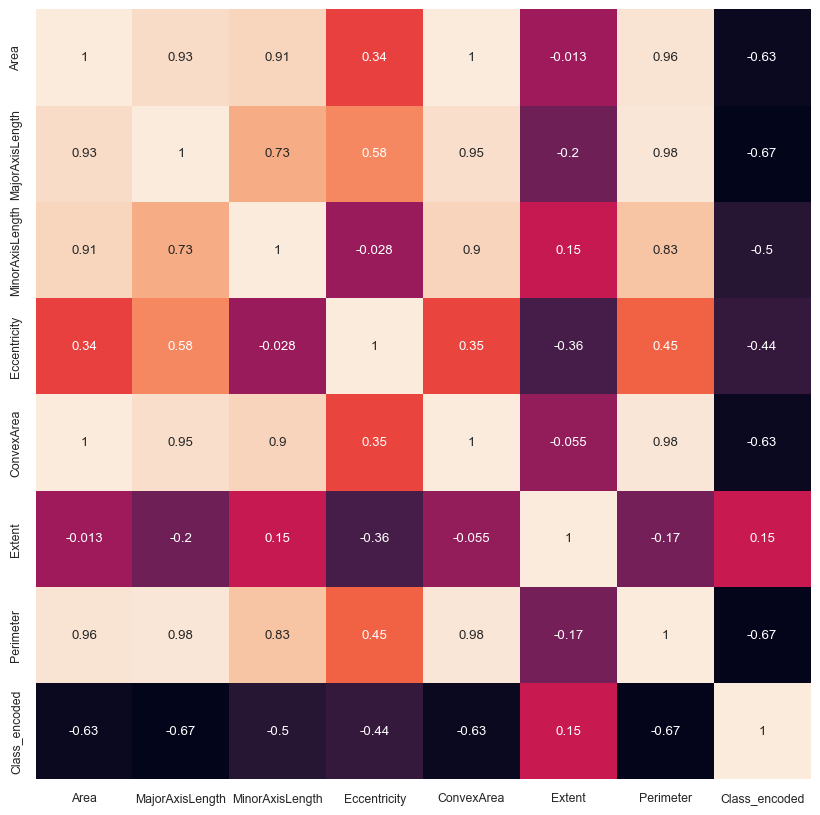

In [19]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
X = df.drop('Class_encoded',axis=1)
X.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [25]:
y = df['Class_encoded']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class_encoded, dtype: int32

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(720, 7) (720,)
(180, 7) (180,)


## **1. LR**

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

print('평균제곱근오차 sol1')
model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

print('\n평균제곱근오차 sol2')
def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

print('\n평균제곱근오차 sol3')
def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 sol1
평균제곱근오차 0.12838930296335668

평균제곱근오차 sol2
평균제곱근오차 0.12838930296335668

평균제곱근오차 sol3
평균제곱근오차 0.12838930296335668


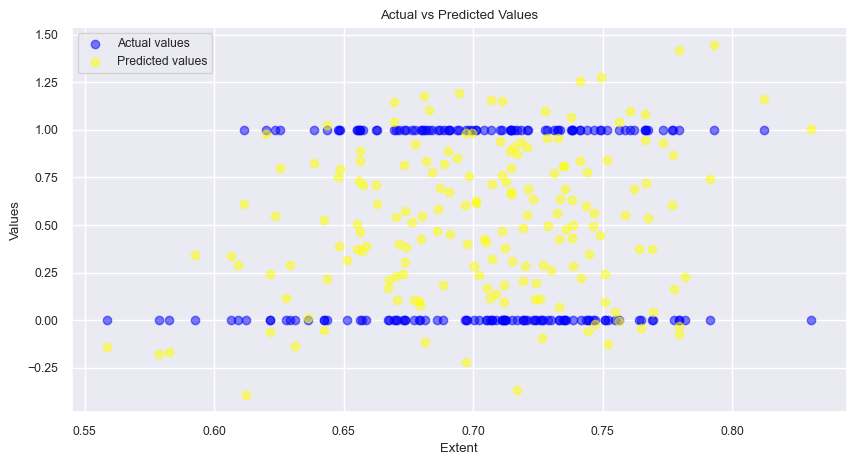

In [52]:
# 예측값과 실제 값 차이를 산점도로 표시, 노란색 예측
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Extent'], y_test, label='Actual values', c='blue', alpha=0.5)
plt.scatter(X_test['Extent'], ly_preds, c='yellow', label='Predicted values', alpha=0.5)
plt.xlabel('Extent')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## **2. DT**

In [54]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 0.2


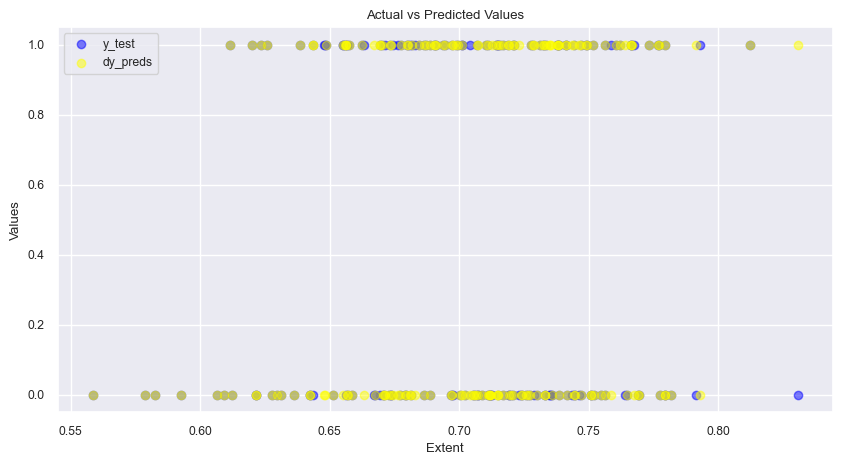

In [56]:
# 예측값과 실제 값 차이를 산점도로 표시, 노란색 예측
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Extent'], y_test, label='y_test', c='blue', alpha=0.5)
plt.scatter(X_test['Extent'], dy_preds, c='yellow', label='dy_preds', alpha=0.5)
plt.xlabel('Extent')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## **3. RF**

In [58]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.09785666666666668


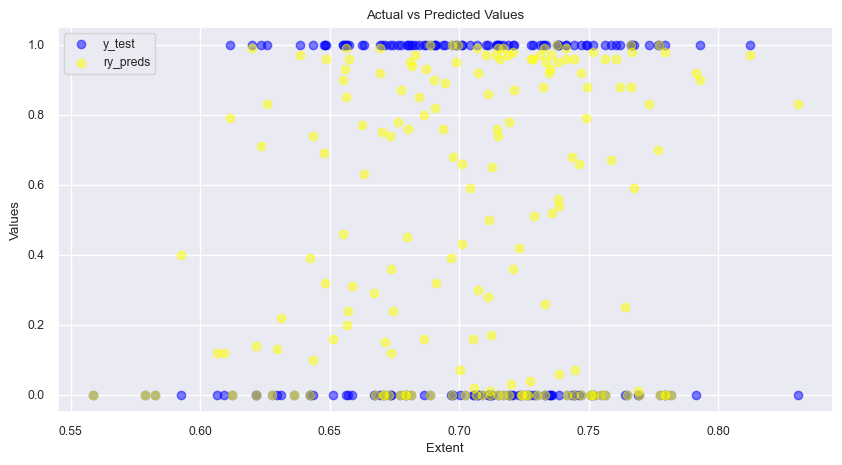

In [60]:
# 예측값과 실제 값 차이를 산점도로 표시, 노란색 예측
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Extent'], y_test, label='y_test', c='blue', alpha=0.5)
plt.scatter(X_test['Extent'], ry_preds, c='yellow', label='ry_preds', alpha=0.5)
plt.xlabel('Extent')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

## **4. SVR**

In [62]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 5795398.20957756


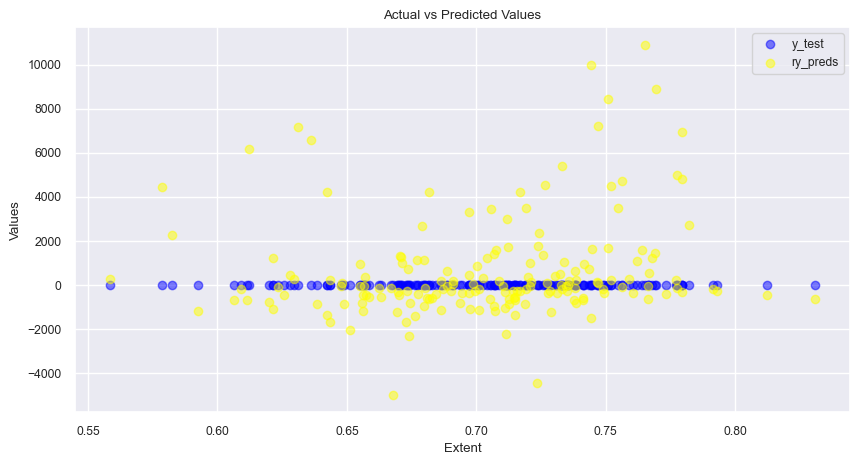

In [72]:
# 예측값과 실제 값 차이를 산점도로 표시, 노란색 예측
plt.figure(figsize=(10, 5))
plt.scatter(X_test['Extent'], y_test, label='y_test', c='blue', alpha=0.5)
plt.scatter(X_test['Extent'], ry_preds, c='yellow', label='ry_preds', alpha=0.5)
plt.xlabel('Extent')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()